<h1>APP ANALYSIS WHILE NOT STUDYING</h1>

In [30]:
import pandas as pd

In [31]:
usage = pd.read_csv('DATA/CLASS_USAGExNOTSTUDY.csv')

In [32]:
usage.head()

,Unnamed: 0,userid,name,start_timestamp,end_timestamp,study
0,0,1,Productivity,2020-11-12 11:17:09.528,2020-11-12 11:17:14.540,False
1,1,1,Productivity,2020-11-12 11:17:19.540,2020-11-12 11:17:19.540,False
2,3,1,Altro,2020-11-12 11:17:38.689,2020-11-12 11:17:43.697,False
3,5,1,Chat,2020-11-12 11:18:04.663,2020-11-12 11:21:00.473,False
4,7,1,Chat,2020-11-12 11:21:55.668,2020-11-12 11:22:30.743,False


In [33]:
usage = usage.drop("Unnamed: 0", axis=1)

In [34]:
usage

,userid,name,start_timestamp,end_timestamp,study
0,1,Productivity,2020-11-12 11:17:09.528,2020-11-12 11:17:14.540,False
1,1,Productivity,2020-11-12 11:17:19.540,2020-11-12 11:17:19.540,False
2,1,Altro,2020-11-12 11:17:38.689,2020-11-12 11:17:43.697,False
3,1,Chat,2020-11-12 11:18:04.663,2020-11-12 11:21:00.473,False
4,1,Chat,2020-11-12 11:21:55.668,2020-11-12 11:22:30.743,False
...,...,...,...,...,...
157506,264,Chat,2020-12-12 00:56:22.481,2020-12-12 00:56:32.483,False
157507,264,Game,2020-12-12 00:56:37.483,2020-12-12 01:41:55.874,False
157508,264,Social,2020-12-12 01:42:05.884,2020-12-12 01:46:41.471,False
157509,264,Social,2020-12-12 01:46:46.479,2020-12-12 01:51:01.660,False


In [35]:
usage['start_timestamp'] = pd.to_datetime(usage['start_timestamp'])
usage['end_timestamp'] = pd.to_datetime(usage['end_timestamp'])
usage['duration'] = (usage['end_timestamp'] - usage['start_timestamp']).dt.total_seconds()

In [36]:
def transformINT(duration):
    return int(duration)
usage['duration'] = usage['duration'].map(transformINT)

In [37]:
encodiz = dict()
i=0
lista = ['Chat','Social', 'Media', 'Productivity', 'Health & Fitness', 'Altro', 'Finanza', 'Shopping', 'Game']
for el in lista:
    encodiz[el] = i
    i+=1
print("This is the encoding:", encodiz)
def encodeName(name):
    return encodiz[name]
usage['name'] = usage['name'].map(encodeName)
usage.head()

This is the encoding: {'Chat': 0, 'Social': 1, 'Media': 2, 'Productivity': 3, 'Health & Fitness': 4, 'Altro': 5, 'Finanza': 6, 'Shopping': 7, 'Game': 8}


,userid,name,start_timestamp,end_timestamp,study,duration
0,1,3,2020-11-12 11:17:09.528,2020-11-12 11:17:14.540,False,5
1,1,3,2020-11-12 11:17:19.540,2020-11-12 11:17:19.540,False,0
2,1,5,2020-11-12 11:17:38.689,2020-11-12 11:17:43.697,False,5
3,1,0,2020-11-12 11:18:04.663,2020-11-12 11:21:00.473,False,175
4,1,0,2020-11-12 11:21:55.668,2020-11-12 11:22:30.743,False,35


In [38]:
mio_dizionario = encodiz.copy()
invDiz = {valore: chiave for chiave, valore in mio_dizionario.items()}

In [39]:
usage

,userid,name,start_timestamp,end_timestamp,study,duration
0,1,3,2020-11-12 11:17:09.528,2020-11-12 11:17:14.540,False,5
1,1,3,2020-11-12 11:17:19.540,2020-11-12 11:17:19.540,False,0
2,1,5,2020-11-12 11:17:38.689,2020-11-12 11:17:43.697,False,5
3,1,0,2020-11-12 11:18:04.663,2020-11-12 11:21:00.473,False,175
4,1,0,2020-11-12 11:21:55.668,2020-11-12 11:22:30.743,False,35
...,...,...,...,...,...,...
157506,264,0,2020-12-12 00:56:22.481,2020-12-12 00:56:32.483,False,10
157507,264,8,2020-12-12 00:56:37.483,2020-12-12 01:41:55.874,False,2718
157508,264,1,2020-12-12 01:42:05.884,2020-12-12 01:46:41.471,False,275
157509,264,1,2020-12-12 01:46:46.479,2020-12-12 01:51:01.660,False,255


In [40]:
app_data = pd.DataFrame({
    'userid': usage['userid'],
    'category': usage['name'],
    'duration': usage['duration']
})

user_app_matrix = app_data.pivot_table(index='userid', columns='category', values='duration', aggfunc='sum', fill_value=0)
user_app_matrix.head()

category,0,1,2,3,4,5,6,7,8
userid,,,,,,,,,
1,235194,35236,10238,22650,70,3242,0,1513,12579
3,94993,20193,3234,22157,0,533,240,380,300
5,12054,115772,104996,64740,1163,13422,75,2648,33693
8,102718,44332,5771,17076,0,3176,155,0,11580
9,23926,81748,33752,63684,0,1183,71,110,4339


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
user_app_matrix_scaled = scaler.fit_transform(user_app_matrix)
user_app_matrix_scaled_df = pd.DataFrame(user_app_matrix_scaled, columns=user_app_matrix.columns)
user_app_matrix_scaled_df.head()

category,0,1,2,3,4,5,6,7,8
0,1.270618,-0.478069,-0.689202,-0.527366,-0.219853,-0.382027,-0.244722,-0.230529,-0.094665
1,-0.040561,-0.639444,-0.826247,-0.535510,-0.222326,-0.412115,-0.184565,-0.339587,-0.483703
2,-0.816218,0.385889,1.164894,0.167985,-0.181227,-0.268960,-0.225923,-0.121279,0.574295
3,0.031684,-0.380490,-0.776606,-0.619451,-0.222326,-0.382760,-0.205870,-0.376164,-0.126316
4,-0.705189,0.020893,-0.229112,0.150539,-0.222326,-0.404896,-0.226925,-0.365576,-0.355735


In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
user_app_matrix['cluster'] = kmeans.fit_predict(user_app_matrix_scaled)
user_app_matrix

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


category,0,1,2,3,4,5,6,7,8,cluster
userid,,,,,,,,,,
1,235194,35236,10238,22650,70,3242,0,1513,12579,1
3,94993,20193,3234,22157,0,533,240,380,300,1
5,12054,115772,104996,64740,1163,13422,75,2648,33693,1
8,102718,44332,5771,17076,0,3176,155,0,11580,1
9,23926,81748,33752,63684,0,1183,71,110,4339,1
...,...,...,...,...,...,...,...,...,...,...
254,162244,62554,15806,23724,4805,17255,211,6241,0,1
255,49395,40178,14254,9848,0,48655,0,0,0,1
256,61402,67771,11446,58163,0,7081,361,8580,24466,1


In [43]:
cluster_means = user_app_matrix.groupby('cluster').mean()
print(cluster_means)

category              0              1              2              3  \
cluster                                                                
0         226172.368421  214616.842105   68772.736842  119881.105263   
1          66115.837500   47908.237500   36478.062500   39905.950000   
2         162897.000000   48029.500000   55378.000000   29333.000000   
3         219330.000000  133202.000000  301370.000000   37436.000000   

category              4             5            6             7             8  
cluster                                                                         
0           2979.368421  54060.684211  1470.947368   4527.210526  30190.263158  
1           2157.437500  33296.225000   885.675000   2631.450000  11960.762500  
2         199351.500000  26623.500000   100.000000   2194.500000   2969.000000  
3          13808.000000  94965.000000   584.000000  97690.000000  51405.000000  


In [44]:
clustered_users =  user_app_matrix.groupby('userid')
dizio_clusters = user_app_matrix['cluster'].to_dict()
cluster_stats = user_app_matrix.groupby('cluster').describe()
print(cluster_stats)

category     0                                                               \
         count           mean            std       min        25%       50%   
cluster                                                                       
0         19.0  226172.368421  165156.813078   16522.0  114892.50  216715.0   
1         80.0   66115.837500   54380.138518       0.0   27668.25   51665.0   
2          2.0  162897.000000  158703.045970   50677.0  106787.00  162897.0   
3          1.0  219330.000000            NaN  219330.0  219330.00  219330.0   

category                          1                 ...         7           \
                75%       max count           mean  ...       75%      max   
cluster                                             ...                      
0         293650.50  729139.0  19.0  214616.842105  ...   5110.50  23008.0   
1         100447.75  235194.0  80.0   47908.237500  ...   2648.75  18892.0   
2         219007.00  275117.0   2.0   48029.500000  ... 

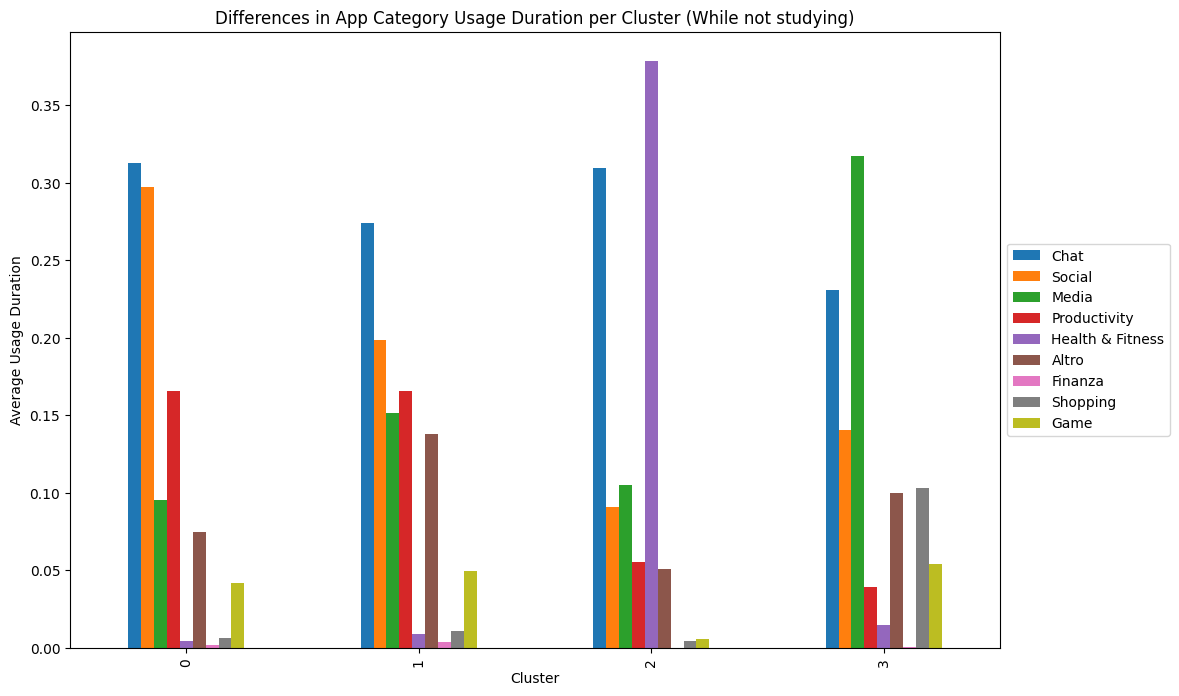

In [45]:
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

ax = cluster_means_normalized.plot(kind='bar', figsize=(12, 8))
ax.legend(labels=[invDiz[int(label.get_text())] for label in ax.get_legend().get_texts()], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Differences in App Category Usage Duration per Cluster (While not studying)')
plt.xlabel('Cluster')
plt.ylabel('Average Usage Duration')
plt.show()

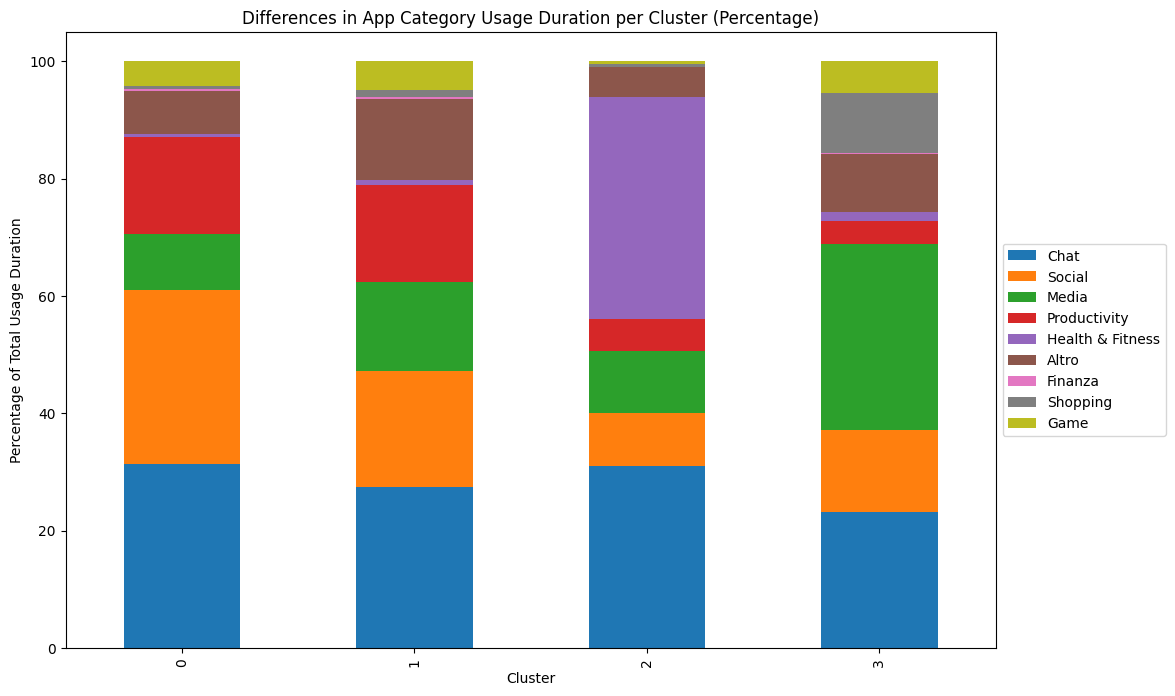

In [17]:
cluster_totals = cluster_means.sum(axis=1)
cluster_percentages = cluster_means.div(cluster_totals, axis=0) * 100
ax = cluster_percentages.plot(kind='bar', figsize=(12, 8), stacked=True)

ax.legend(labels=[invDiz[int(label.get_text())] for label in ax.get_legend().get_texts()], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Differences in App Category Usage Duration per Cluster (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Total Usage Duration')
plt.show()

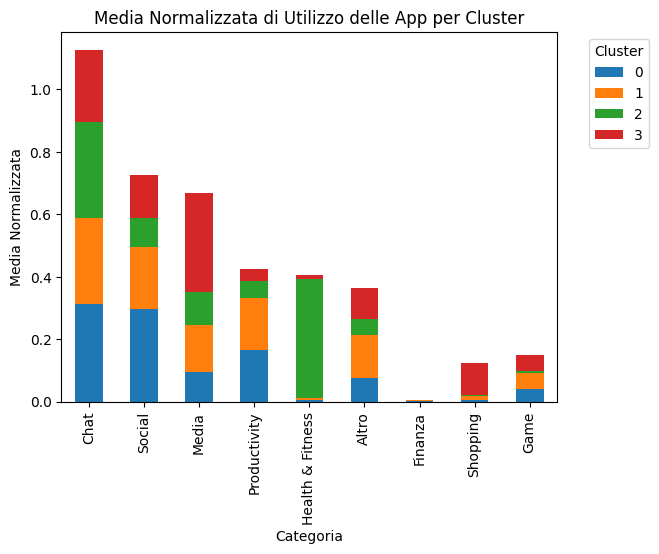

In [18]:
# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Plot
ax = cluster_means_normalized.T.plot(kind='bar', stacked=True)

# Mappare i numeri alle etichette desiderate sull'asse x usando invDiz
new_labels = [invDiz[int(label.get_text().split()[-1])] for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels)

plt.title('Media Normalizzata di Utilizzo delle App per Cluster')
plt.xlabel('Categoria')
plt.ylabel('Media Normalizzata')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

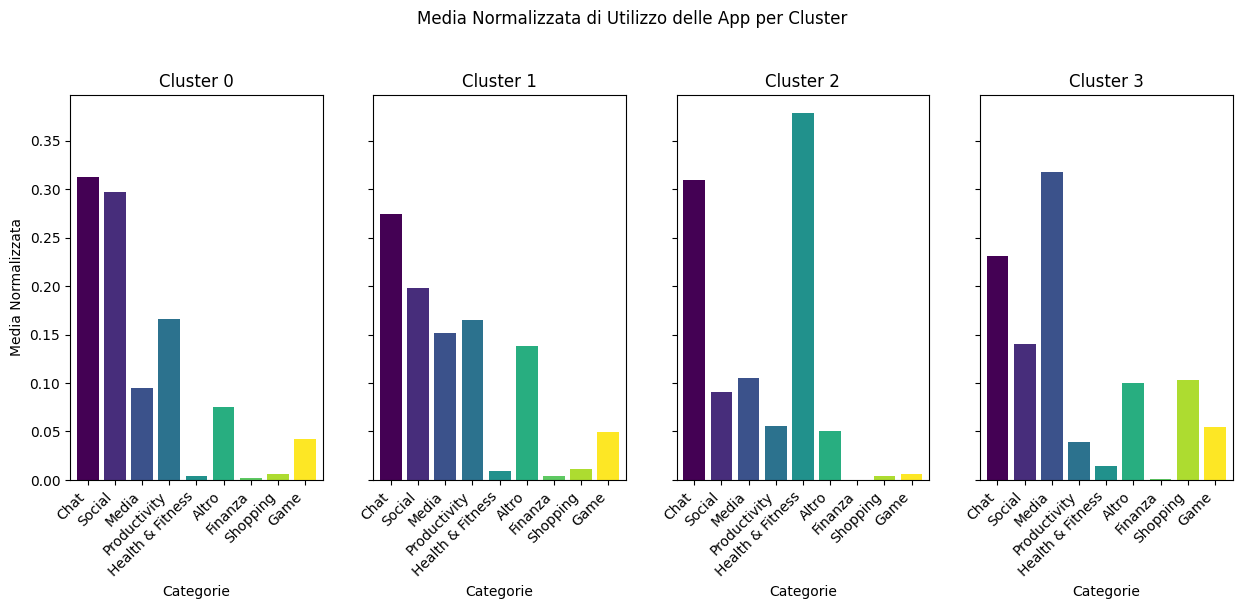

In [19]:
import numpy as np
# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=len(cluster_means_normalized), figsize=(15, 5), sharey=True)

for i, (cluster, data) in enumerate(cluster_means_normalized.iterrows()):
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))  # Colormap per variare i colori
    data.plot(kind='bar', ax=axes[i], color=colors, width=0.8)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Categorie')
    try:
        axes[i].set_xticklabels(new_labels, rotation=45, ha='right', fontsize=10)
    except:
        pass
    axes[i].set_ylabel('Media Normalizzata')

plt.suptitle('Media Normalizzata di Utilizzo delle App per Cluster', y=1.05)
plt.show()

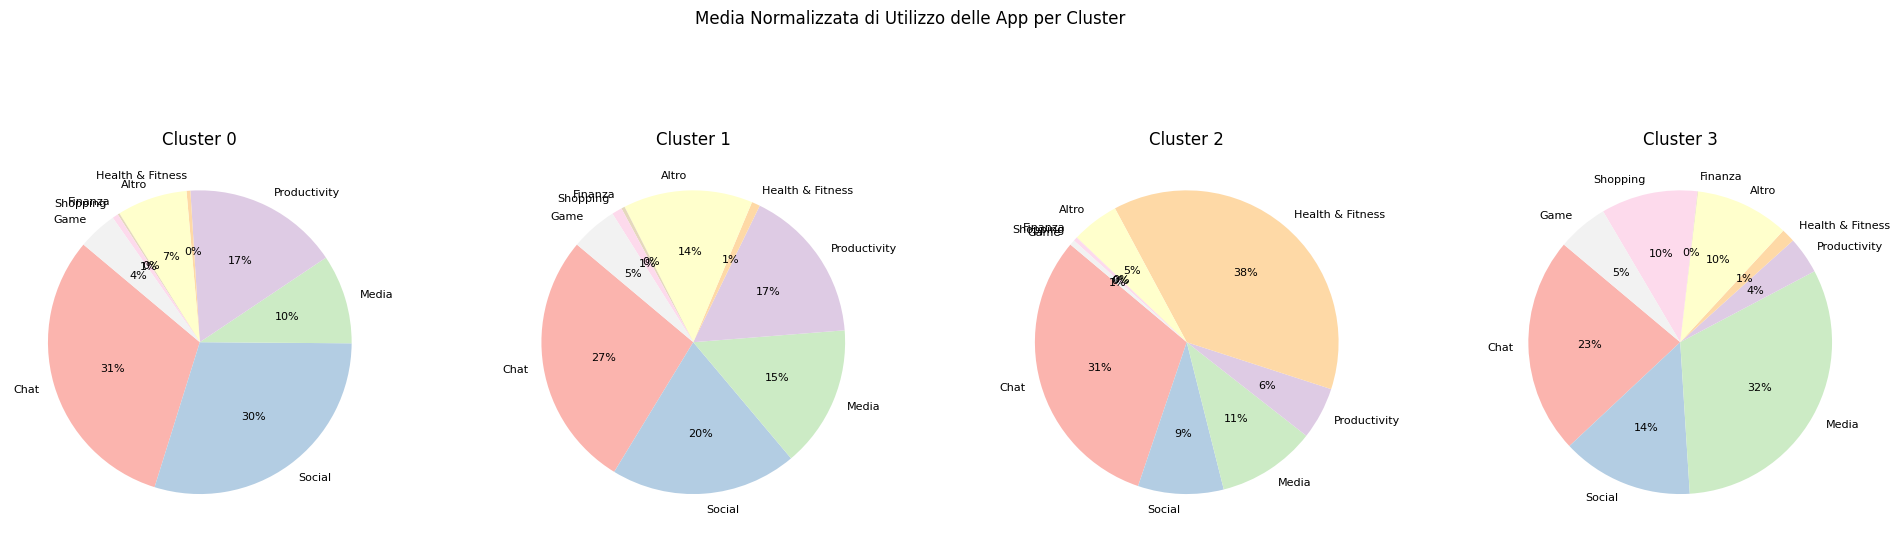

In [20]:
import numpy as np

# Calcolare la media di utilizzo delle app per ogni cluster
cluster_means = user_app_matrix.groupby('cluster').mean()

# Normalizzare i valori dividendo per la somma totale di ogni cluster
cluster_means_normalized = cluster_means.div(cluster_means.sum(axis=1), axis=0)

# Determinare il numero di cluster
num_clusters = len(cluster_means_normalized)

# Aumentare la larghezza della figura per evitare la sovrapposizione delle percentuali
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(6 * num_clusters, 6), subplot_kw=dict(aspect="equal"))

for i, (cluster, data) in enumerate(cluster_means_normalized.iterrows()):
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(data)))  # Colormap per variare i colori
    # Usare i nomi delle categorie come etichette se new_labels è definito
    labels = new_labels if 'new_labels' in locals() else data.index
    data.plot(kind='pie', ax=axes[i], colors=colors, autopct='%1.0f%%', startangle=140, labels=labels, textprops={'fontsize': 8})
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_ylabel('')  # Rimuovere l'etichetta y

# Aumentare lo spazio tra i diagrammi a torta se necessario
plt.subplots_adjust(wspace=0.3)

plt.suptitle('Media Normalizzata di Utilizzo delle App per Cluster', y=1.05)
plt.show()



In [25]:
user_app_matrix['cluster']

userid
1      1
3      1
5      1
8      1
9      1
      ..
254    1
255    1
256    1
262    1
264    1
Name: cluster, Length: 102, dtype: int32

In [26]:
user_app_matrix['cluster'].to_csv("DATA/clusters_notstudy.csv")

In [27]:
user_app_matrix.to_csv("DATA/user_app_matrix_notstudy.csv")

In [28]:
invDiz

{0: 'Chat',
 1: 'Social',
 2: 'Media',
 3: 'Productivity',
 4: 'Health & Fitness',
 5: 'Altro',
 6: 'Finanza',
 7: 'Shopping',
 8: 'Game'}